# El modelo de **Izhikevich**

## **Ejercicio 1)** Importando librerías

**1)** Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

**2)** Incorpore a la notebook el integrador de ODEs de la guía anterior.


In [1]:
# 1.1)
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [2]:
# 1.2)
import ode

## **Ejercicio 2)** Modelo de Izhikevich

El modelo de Izhikevich (ref. 1.) es una simplificación del conocido modelo que Hodgkin y Huxley introdujeron en 1952 (ref. 2. y premio Nobel en Fisiología y Medicina de 1963) para describir el comportamiento del potencial de disparo de una neurona.

El modelo de Izhikevich se describe en términos de la siguiente ODE bidimensional y de primer orden

$$
\begin{aligned}
v'(t) &= g_2\,v^2(t) + g_1\,v(t) + g_0 - u(t) + I(t) \\
u'(t) &= b\,(c\,v(t)-u(t))
\end{aligned}
$$

unida al mecanismo de _reseteo_ del potencial

$$
\begin{aligned}
v(t) &\leftarrow v_- \\
u(t) &\leftarrow u(t) + \Delta u
\end{aligned}
$$

la cuál emula el disparo de la neurona, imponiéndose cuando la condición \(v(t)\geq v\_+\) se cumple.

En todas estas ecuaciones, $g_2$, $g_1$, $g_0$, $v_-$, $v_+$, $b$, $c$ y $\Delta u$ son parámetros del modelo.

Además, se considera la función dependiente del tiempo \(I:\mathbb{R}\ni t\to I(t)\in \mathbb{R}\), la cual representa una corriente de entrada que excita a la neurona.

**Referencias:**

1. [Eugene M. Izhikevich, Simple Model of Spiking Neurons, IEEE TRANSACTIONS ON NEURAL NETWORKS, VOL. 14, NO. 6, P. 1569, NOVEMBER 2003](https://ieeexplore.ieee.org/document/1257420)  
   [PDF de acceso libre](https://www.izhikevich.org/publications/spikes.pdf)
2. https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model

---

**1)** Integre el modelo de Izhikevich usando el método RK4 en el intervalo de tiempo

- $t\in [0,200]$

Considere, para ello, la siguiente elección de valores de los parámetros (pero pruebe variaciones para los distintos casos)

- $g_2=0.04$
- $g_1=5$
- $g_0=140$
- $v_-=-65$
- $v_+=30$
- $b=0.02$
- $c=0.2$
- $\Delta u=2$

una corriente de entrada

$$
I(t)=
\begin{cases}
0, & t < 10,\\
10, & \text{c.c.}
\end{cases}
$$

y comience probando con la condición inicial

- $v(0) = -70$
- $u(0) = c\,v(0)$

Además, utilice el paso de integración $h=0.1$.

---

**2)** Grafique la solución.

---

**3)** Reproduzca, aproximadamente, los últimos 8 paneles de la figura 2 del paper en la referencia 1.

Para ello, tenga en cuenta la siguiente tabla confeccionada a partir de la información en la figura 2 del paper:

**Tabla 1. Parmaterización por caso.**

| Caso | b    | c    | $v_-$ | $\Delta u$ | $I$   |
| ---- | ---- | ---- | ----- | ---------- | ----- |
| RS   | 0.02 | 0.2  | -65   | 8          | $I_1$ |
| IB   | 0.02 | 0.2  | -55   | 4          | $I_1$ |
| CH   | 0.02 | 0.2  | -50   | 2          | $I_1$ |
| FS   | 0.1  | 0.2  | -65   | 2          | $I_1$ |
| TC1  | 0.02 | 0.25 | -65   | 0.05       | $I_2$ |
| TC2  | 0.02 | 0.25 | -65   | 0.05       | $I_3$ |
| RZ   | 0.1  | 0.26 | -65   | 2          | $I_4$ |
| LTS  | 0.02 | 0.25 | -65   | 2          | $I_1$ |

donde

$$
I_1(t)=
\begin{cases}
0, & t < 25,\\
10, & \text{c.c.}
\end{cases}
$$

$$
I_2(t)=
\begin{cases}
0, & t < 150,\\
2.5, & \text{c.c.}
\end{cases}
$$

$$
I_3(t)=
\begin{cases}
-15, & t < 100,\\
0, & \text{c.c.}
\end{cases}
$$

$$
I_4(t)=
\begin{cases}
0, & t < 10,\\
0.2, & 10 \le t < 100,\\
10, & 100 \le t < 101,\\
0.2, & \text{c.c.}
\end{cases}
$$


In [3]:
def f(x, t, p):
    """
    x[0] = v(t)
    x[1] = u(t)
    p[0] = g2
    p[1] = g1
    p[2] = g0
    p[3] = vmin
    p[4] = vmax
    p[5] = b
    p[6] = c
    p[7] = delta_u
    p[8] = I(t)
    """
    v = x[0]
    u = x[1]
    g2 = p[0]
    g1 = p[1]
    g0 = p[2]
    vmin = p[3]
    vmax = p[4]
    b = p[5]
    c = p[6]
    delta_u = p[7]
    I = p[8]

    return np.array([
        g2 * v * v + g1 * v + g0 - u + I(t), 
        b * (c*v - u)
    ])

def cond (x, t, p):
    v = x[0]
    u = x[1]
    g2 = p[0]
    g1 = p[1]
    g0 = p[2]
    vmin = p[3]
    vmax = p[4]
    b = p[5]
    c = p[6]
    delta_u = p[7]
    I = p[8]
    if x[0] >= vmax:
        return np.array([vmin, u + delta_u])
    return x 

In [4]:
g2 = 0.04
g1 = 5
g0 = 140
vmin = -65
vmax = 30
b = 0.02
c = 0.2
delta_u = 2

def I(t):
    t0 = 50
    if t < t0:
        return 0
    return 10

p = [g2, g1, g0, vmin, vmax, b, c, delta_u, I]

v0 = -70
u0 = c * v0
x0 = np.array([v0, u0])

In [5]:
t0 = 0
t1 = 200
h = 0.01
k = int((t1 - t0) / h) + 1

t, x = ode.integrador_ode(ode.rk4, f, x0, t0, t1, k, p, c=cond)



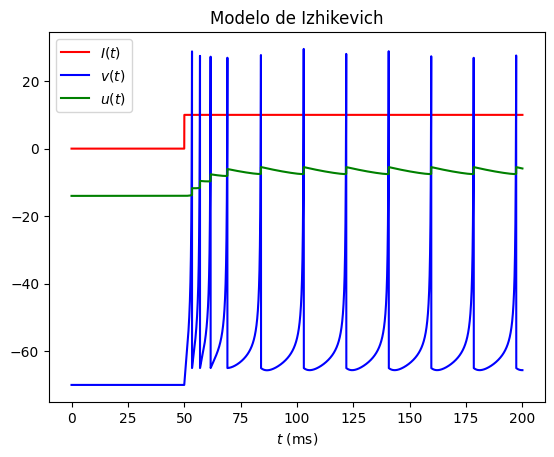

In [6]:
# 2.2) Graficamos la solución

plt.xlabel('$t$ (ms)')
plt.plot(t, np.vectorize(I)(t), color='red', linestyle='-', label='$I(t)$')
plt.plot(t, x[0, :], color='blue', linestyle='-', label='$v(t)$')
plt.plot(t, x[1, :], color='green', linestyle='-', label='$u(t)$')
plt.title('Modelo de Izhikevich')
plt.legend()

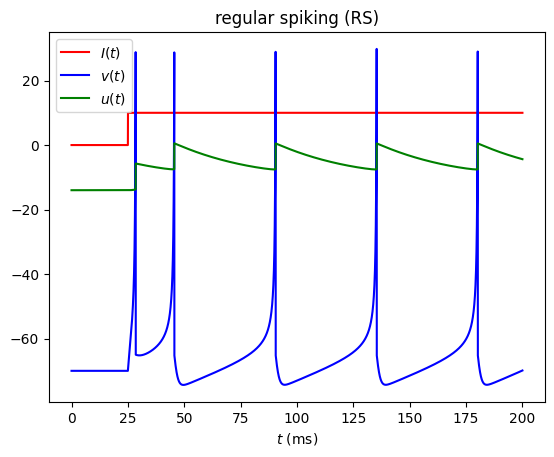

In [7]:
#2.3)
#panel 1

g2 = 0.04
g1 = 5
g0 = 140
vmin = -65
vmax = 30
b = 0.02
c = 0.2
delta_u = 8

def I1(t):
    t0 = 25
    if t < t0:
        return 0
    return 10

p = [g2, g1, g0, vmin, vmax, b, c, delta_u, I1]

v0 = -70
u0 = c * v0
x0 = np.array([v0, u0])

t, x = ode.integrador_ode(ode.rk4, f, x0, t0, t1, k, p, c=cond)

plt.xlabel('$t$ (ms)')
plt.plot(t, np.vectorize(I1)(t), color='red', linestyle='-', label='$I(t)$')
plt.plot(t, x[0, :], color='blue', linestyle='-', label='$v(t)$')
plt.plot(t, x[1, :], color='green', linestyle='-', label='$u(t)$')
plt.title('regular spiking (RS)')
plt.legend()



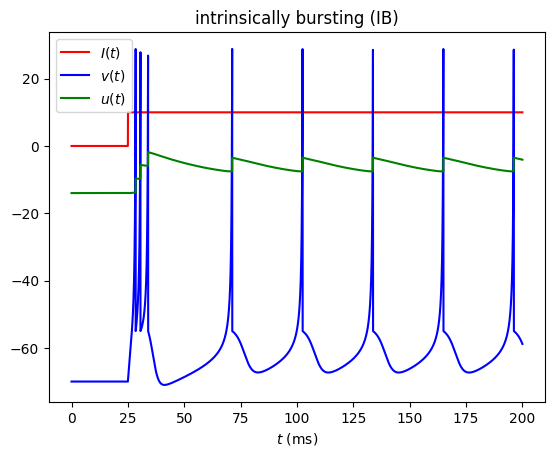

In [8]:
#panel 2
g2 = 0.04
g1 = 5
g0 = 140
vmin = -55
vmax = 30
b = 0.02
c = 0.2
delta_u = 4

p = [g2, g1, g0, vmin, vmax, b, c, delta_u, I1]

v0 = -70
u0 = c * v0
x0 = np.array([v0, u0])
t, x = ode.integrador_ode(ode.rk4, f, x0, t0, t1, k, p, c=cond)

plt.xlabel('$t$ (ms)')
plt.plot(t, np.vectorize(I1)(t), color='red', linestyle='-', label='$I(t)$')
plt.plot(t, x[0, :], color='blue', linestyle='-', label='$v(t)$')
plt.plot(t, x[1, :], color='green', linestyle='-', label='$u(t)$')
plt.title('intrinsically bursting (IB)')
plt.legend()

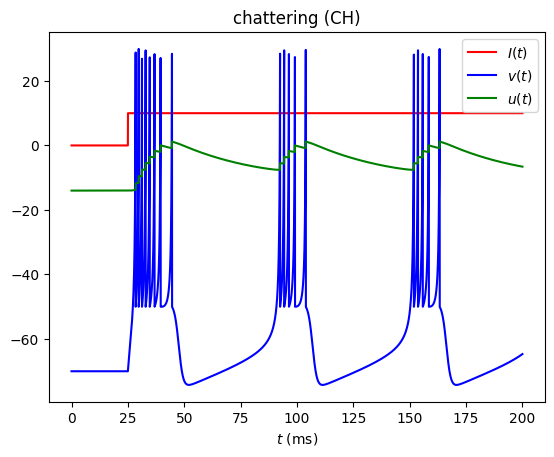

In [9]:
#panel 3
g2 = 0.04
g1 = 5
g0 = 140
vmin = -50
vmax = 30
b = 0.02
c = 0.2
delta_u = 2
p = [g2, g1, g0, vmin, vmax, b, c, delta_u, I1]
v0 = -70
u0 = c * v0
x0 = np.array([v0, u0])
t, x = ode.integrador_ode(ode.rk4, f, x0, t0, t1, k, p, c=cond)
plt.xlabel('$t$ (ms)')
plt.plot(t, np.vectorize(I1)(t), color='red', linestyle='-', label='$I(t)$')
plt.plot(t, x[0, :], color='blue', linestyle='-', label='$v(t)$')
plt.plot(t, x[1, :], color='green', linestyle='-', label='$u(t)$')
plt.title('chattering (CH)')
plt.legend()

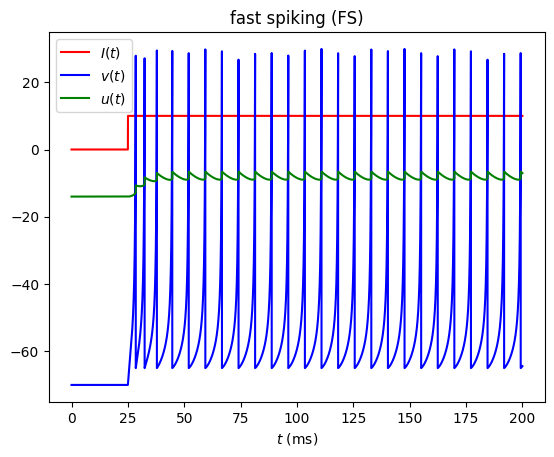

In [10]:
# panel 4

g2 = 0.04
g1 = 5
g0 = 140
vmin = -65
vmax = 30
b = 0.1
c = 0.2
delta_u = 2

p = [g2, g1, g0, vmin, vmax, b, c, delta_u, I1]
v0 = -70
u0 = c * v0
x0 = np.array([v0, u0])
t, x = ode.integrador_ode(ode.rk4, f, x0, t0, t1, k, p, c=cond)
plt.xlabel('$t$ (ms)')
plt.plot(t, np.vectorize(I1)(t), color='red', linestyle='-', label='$I(t)$')
plt.plot(t, x[0, :], color='blue', linestyle='-', label='$v(t)$')
plt.plot(t, x[1, :], color='green', linestyle='-', label='$u(t)$')
plt.title('fast spiking (FS)')
plt.legend()

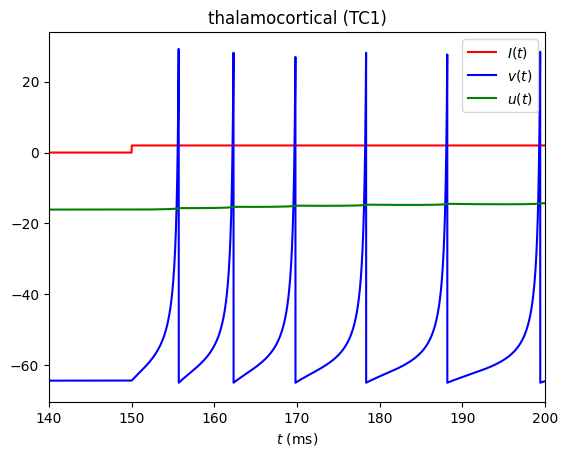

In [11]:
# panel 5
g2 = 0.04
g1 = 5
g0 = 140
vmin = -65
vmax = 30
b = 0.02
c = 0.25
delta_u = 0.05

def I2(t):
    t0 = 150
    if t < t0:
        return 0
    return 2.5

p = [g2, g1, g0, vmin, vmax, b, c, delta_u, I2]
v0 = -63
u0 = c * v0
x0 = np.array([v0, u0])
t, x = ode.integrador_ode(ode.rk4, f, x0, t0, t1, k, p, c=cond)
plt.xlabel('$t$ (ms)')
plt.xlim(140, 200)
plt.plot(t, np.vectorize(I2)(t), color='red', linestyle='-', label='$I(t)$')
plt.plot(t, x[0, :], color='blue', linestyle='-', label='$v(t)$')
plt.plot(t, x[1, :], color='green', linestyle='-', label='$u(t)$')
plt.title('thalamocortical (TC1)')
plt.legend()

Text(0.5, 1.0, 'thalamocortical (TC2)')

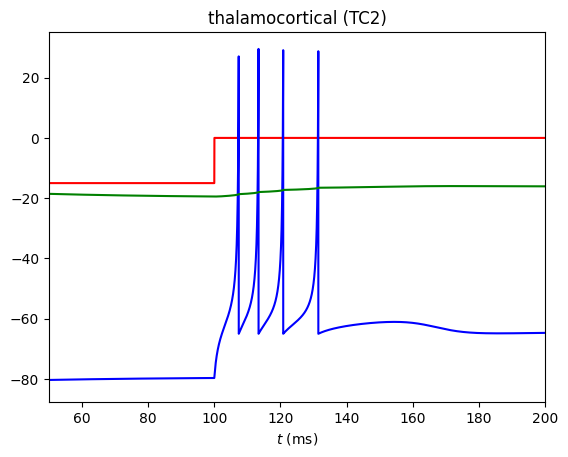

In [12]:
# panel 6
g2 = 0.04
g1 = 5
g0 = 140
vmin = -65
vmax = 30
b = 0.02
c = 0.25
delta_u = 0.05

def I3(t):
    t0 = 100
    if t < t0:
        return -15
    return 0

p = [g2, g1, g0, vmin, vmax, b, c, delta_u, I3]
v0 = -63
u0 = c * v0
x0 = np.array([v0, u0])
t, x = ode.integrador_ode(ode.rk4, f, x0, t0, t1, k, p, c=cond)
plt.xlabel('$t$ (ms)')
plt.xlim(50, 200)
plt.plot(t, np.vectorize(I3)(t), color='red', linestyle='-', label='$I(t)$')
plt.plot(t, x[0, :], color='blue', linestyle='-', label='$v(t)$')
plt.plot(t, x[1, :], color='green', linestyle='-', label='$u(t)$')
plt.title('thalamocortical (TC2)')

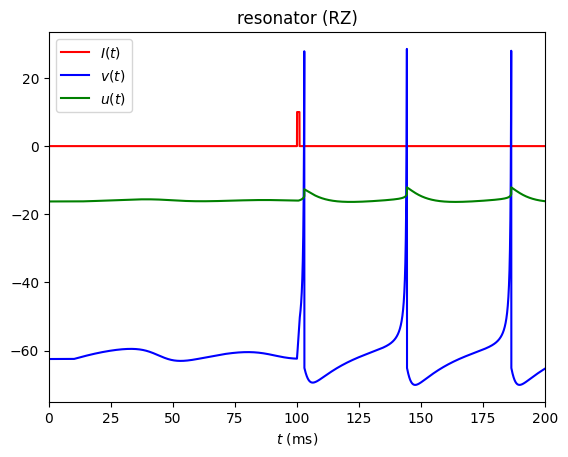

In [13]:
# panel 7
g2 = 0.04
g1 = 5
g0 = 140
vmin = -65
vmax = 30
b = 0.1
c = 0.26
delta_u = 2

def I4(t):
    t0 = 10
    t1 = 100
    t2 = t1 + 1
    I0 = 0 
    I1 = .2
    I2 = 10
    if t < t0:
        return I0
    elif t0 <= t and t < t1:
        return I1
    elif t1 <= t and t < t2:
        return I2
    else :
        return I1
    
p = [g2, g1, g0, vmin, vmax, b, c, delta_u, I4]
v0 = -62.5
u0 = c * v0
x0 = np.array([v0, u0])
t, x = ode.integrador_ode(ode.rk4, f, x0, t0, t1, k, p, c=cond)
plt.xlabel('$t$ (ms)')
plt.xlim(0, 200)
plt.plot(t, np.vectorize(I4)(t), color='red', linestyle='-', label='$I(t)$')
plt.plot(t, x[0, :], color='blue', linestyle='-', label='$v(t)$')
plt.plot(t, x[1, :], color='green', linestyle='-', label='$u(t)$')
plt.title('resonator (RZ)')
plt.legend()


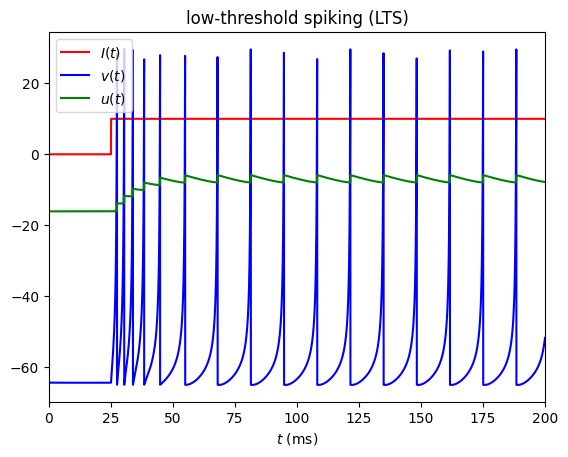

In [14]:
# panel 8
g2 = 0.04
g1 = 5
g0 = 140
vmin = -65
vmax = 30
b = 0.02
c = 0.25
delta_u = 2

p = [g2, g1, g0, vmin, vmax, b, c, delta_u, I1]

v0 = -64.4
u0 = c * v0
x0 = np.array([v0, u0])
t, x = ode.integrador_ode(ode.rk4, f, x0, t0, t1, k, p, c=cond)

plt.xlabel('$t$ (ms)')
plt.xlim(0, 200)
plt.plot(t, np.vectorize(I1)(t), color='red', linestyle='-', label='$I(t)$')
plt.plot(t, x[0, :], color='blue', linestyle='-', label='$v(t)$')
plt.plot(t, x[1, :], color='green', linestyle='-', label='$u(t)$')
plt.title('low-threshold spiking (LTS)')
plt.legend()

## **Ejercicio 3)** Red de neuronas de Izhikevich

### El método de Euler-Maruyama

Nos interesa resolver una Ecuación Diferencial Estocástica (SDE) de la forma

$$
dX_t = f(X_t,t)\,dt + g(X_t,t)\,dW_t \quad (1)
$$

donde, para cada $t\in \mathbb{R}$, las variables $X_t,W_t$ son estocásticas con soporte en $\mathbb{R}$, y $f,g \in (\mathbb{R}^2\to \mathbb{R})$ son funciones relativamente arbitrarias.
Como función de $t$, asuminos que $W_t$ describe un proceso de Wiener. Es decir, asumimos que

1. $W_t$ es una variable estocástica normalmente distribuida de valor esperado $\langle W_t \rangle = 0$ y varianza $\langle (W_t-\langle W_t\rangle)^2 \rangle = \langle W_t^2 \rangle = wt$ para algún $w\geq 0$, y

2. las variables estocásticas $W_{t+s}-W_s$ (caminatas futuras) y $W_s$ (caminatas pasadas) son estadísticamente independientes para todo $t\geq 0$ y $s\leq t$.

Nos interesa resolver la Ec. (1) en un intervalo $t\in [0,T]$ para una condición inicial $X_0=x_0$.

El método de Euler-Maruyama provee una aproximación $Y_t \approx X_t$ para $t\in \{0,\tau,2\tau,...,T\}$ donde $\tau=T/N$ para algún $N\gg 1$ fijo, y viene dado por la cadena de Markov

$$
Y_{t+\tau} = Y_t + f(Y_t,t)\,\tau + g(Y_t,t)\,w\sqrt{\tau}\,\mathcal{N} \quad (2)
$$

donde $Y_0=x_0$ y $\mathcal{N}$ es una variable aleatoria normalmente distribuida de valor esperado $0$ y varianza $1$.

#### Caso multidimensional

El caso multidimensional es de la forma

$$
dX_t = f(X_t,t)\,dt + g(X_t,t)\,dW_t \quad (4)
$$

donde $X_t,f(X_t,t) \in \mathbb{R}^d$, $g(X_t,t)\in \mathbb{R}^{d\times m}$ y $W_t\in \mathbb{R}^m$ para $d,m \in \mathbb{N}$.

En componentes

$$
dX_{it} = f_i(X_t,t)\,dt + \sum_{j=1}^m g_{ij}(X_t,t)\,dW_{jt} \quad (5)
$$

Luego, la aproximación de Euler-Maruyama toma la forma

$$
Y_{i,t+\tau} = Y_{it} + f_i(Y_t,t)\,\tau + \sum_{j=1}^m g_{ij}(Y_t,t)\,w_j\sqrt{\tau}\,\mathcal{N}_j \quad (6)
$$

donde $\mathcal{N}_1,...,\mathcal{N}_m$ son variables aleatorias independientes, normalmente distribuidas, de valor esperado 0 y varianza 1.

### Red neuronal de Izhikevich

El modelo de neurona de Izhikevich es una Ecuación Diferencial Ordinaria (ODE), por lo que no hay estocasticidad.

Para simular una red, Izhikevich propone acoplar un sistema de neuronas con señales de ruido, tornando la ODE en una SDE.
Concretamente, propone acoplar $n_e$ neuronas exitatorias y $n_i$ neuronas inhibitorias mediante una matriz de interacciones $a_{ij}$ con $i,j\in \{1,2,...,n\}$ para $n:=n_e+n_i$ utilizando la ODE

$$
\begin{aligned}
\dot{v}_i(t) &= g_2\,v_i^2(t) + g_1\,v_i(t) + g_0 - u_i(t) + \sum_{j=1}^n a_{ij}\,\Theta\!\big(v_j(t)\big) \quad (7) \\
\dot{u}_i(t) &= b_i\big(c_i\,v_i(t)-u_i(t)\big)
\end{aligned}
$$

donde $I_i(t) = \sum_{j=1}^n a_{ij}\,\Theta\!\big(v_j(t)\big)$ representa el input externo afectando a la neurona $i$.
Considerando valores $r_{ij}$ tomados aleatoria e independientemente de la distribución uniforme en $[0,1]$, se utiliza $a_{ij}=\tfrac{1}{2}r_{ij}$ para todo $i$ y $j=1,...,n_e$ (i.e. señales provenientes de neuronas exitatorias) y $a_{ij}=-r_{ij}$ para todo $i$ y $j=n_e+1,...,n$ (i.e. señales provenientes de neuronas inhibitorias).
Aquí, la función escalón de Heaviside, la cual satisface $\Theta(x)=1$ si $x>0$ y $\Theta(x)=0$ en caso contrario, es utilizada para normalizar la señal de disparo de las neuronas de entrada.
El disparo de la $i$-ésima neurona se implementa aplicando la condición de reseteo

$$
\begin{aligned}
v_i(t) &\leftarrow v_{i-} \quad (8) \\
u_i(t) &\leftarrow u_i(t) + \Delta u_i
\end{aligned}
$$

cuando $v_i(t) \geq v_{i+}$.
Los valores de los parámetros para las variables exitatorias son $b_i=0.02$, $c_i=0.2$, $v_{i-} = -64+15r_i^2$ y $\Delta u_i = 8-6r_i^2$, donde $R_i$ es la realización de una variable aleatoria definida uniformemente en el intervalo $[0,1]$.
Mientras que para las variables inhibitorias son $b_i=0.02+0.08r_i$, $c_i=0.25-0.05r_i$, $v_{i-} = -65$ y $\Delta u_i = 2$.
Esto introduce heterogeneida en el sistema, y la idea es que los límites $r_i=0$ corresponde neuronas que disparan regularmente, mientras que $r_i=1$ a neuronas _parloteantes_.

Luego, Izhikevich incorpora un ruido estocástico $dW_i(t)$ a la señal de entrada $I_i(t)$, de modo que el sistema de ODEs se transforma en un sistema de SDEs en donde las variables $v_i(t)$ y $u_i(t)$ se convierten en variables estocásticas $V_{i}(t)$ y $U_{i}(t)$, respectivamente.
De esta manera, en la aproximación de Euler-Maruyama, la Ec. (7) adopta la forma

$$
\begin{aligned}
dV_{it} &= \Big(g_2\,V_{it}^2 + g_1\,V_{it} + g_0 - U_{it} + \sum_{j=1}^n a_{ij}\,\Theta(V_{it})\Big)\,dt + dK_{it} \quad (9) \\
dU_{it} &= b_i\big(c_i\,V_{it}-U_{it}\big)\,dt
\end{aligned}
$$

donde $dK_{it}$ representa el ruido estocástico Gaussiano $dW_i(t)$ anteriormente mencionado.
Los valores $dK_{it}$ se obtienen de la distribución Gaussiana de media 0 y desviación estandard igual a $5$ para $i=1,...,n_e$ e igual a $2$ para $i=n_e+1,...,n$.
Obviando el reseteo de la Ec. (8), el sistema de SDEs de la Ec. (9) corresponde al sistema de la Ec. (5) cuando:

1. $X_{it} = V_{it}$,
2. $X_{i+n,t} = U_{it}$,
3. $f_i(X_t,t) = g_2\,X_{it}^2 + g_1\,X_{it} + g_0 - X_{i+n,t} + \sum_{j=1}^n a_{ij}\,\Theta(X_{it})$,
4. $f_{i+n}(X_t,t) = b_i\big(c_i\,X_{it}-X_{i+n,t}\big)$,

para todo $i=1,...,n$,

5. y que

   $$
   g_{ij}(X_t,t)=
   \begin{cases}
   5, & i=j\leq n_e,\\
   2, & n_e \leq i=j\leq n,\\
   0, & \text{c.c.}
   \end{cases}
   $$

   de manera que

   $$
   dK_{it} = \sum_{j=1}^n g_{ij}(X_t,t)\, dW_{jt}
   $$

   donde $dW_{jt}$ es una variable aleatoria tomada de la distribución Gaussiana de media 0 y varianza 1 para todo tiempo $t$ y neurona $j=1,...,n$.

### Refs.

- https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method
- https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/
- https://github.com/mattja/sdeint/blob/master/sdeint/integrate.py
- https://diffeq.sciml.ai/stable/tutorials/sde_example/

**1)** Adapte el código en Matlab del paper de Izhikevich a código en Python.

**2)** Acomode el código anterior a la teoría mencionada remplazando la función escalón $\Theta$ de Heavised por la función

$$
z(v)=\frac{87+v}{450}-0.0193
$$

**3)** Reproduzca la figura 3 del paper. Sugerencia, compartimentabilice el código en funciones, identificando las distintas componentes mencionadas en la teoría.


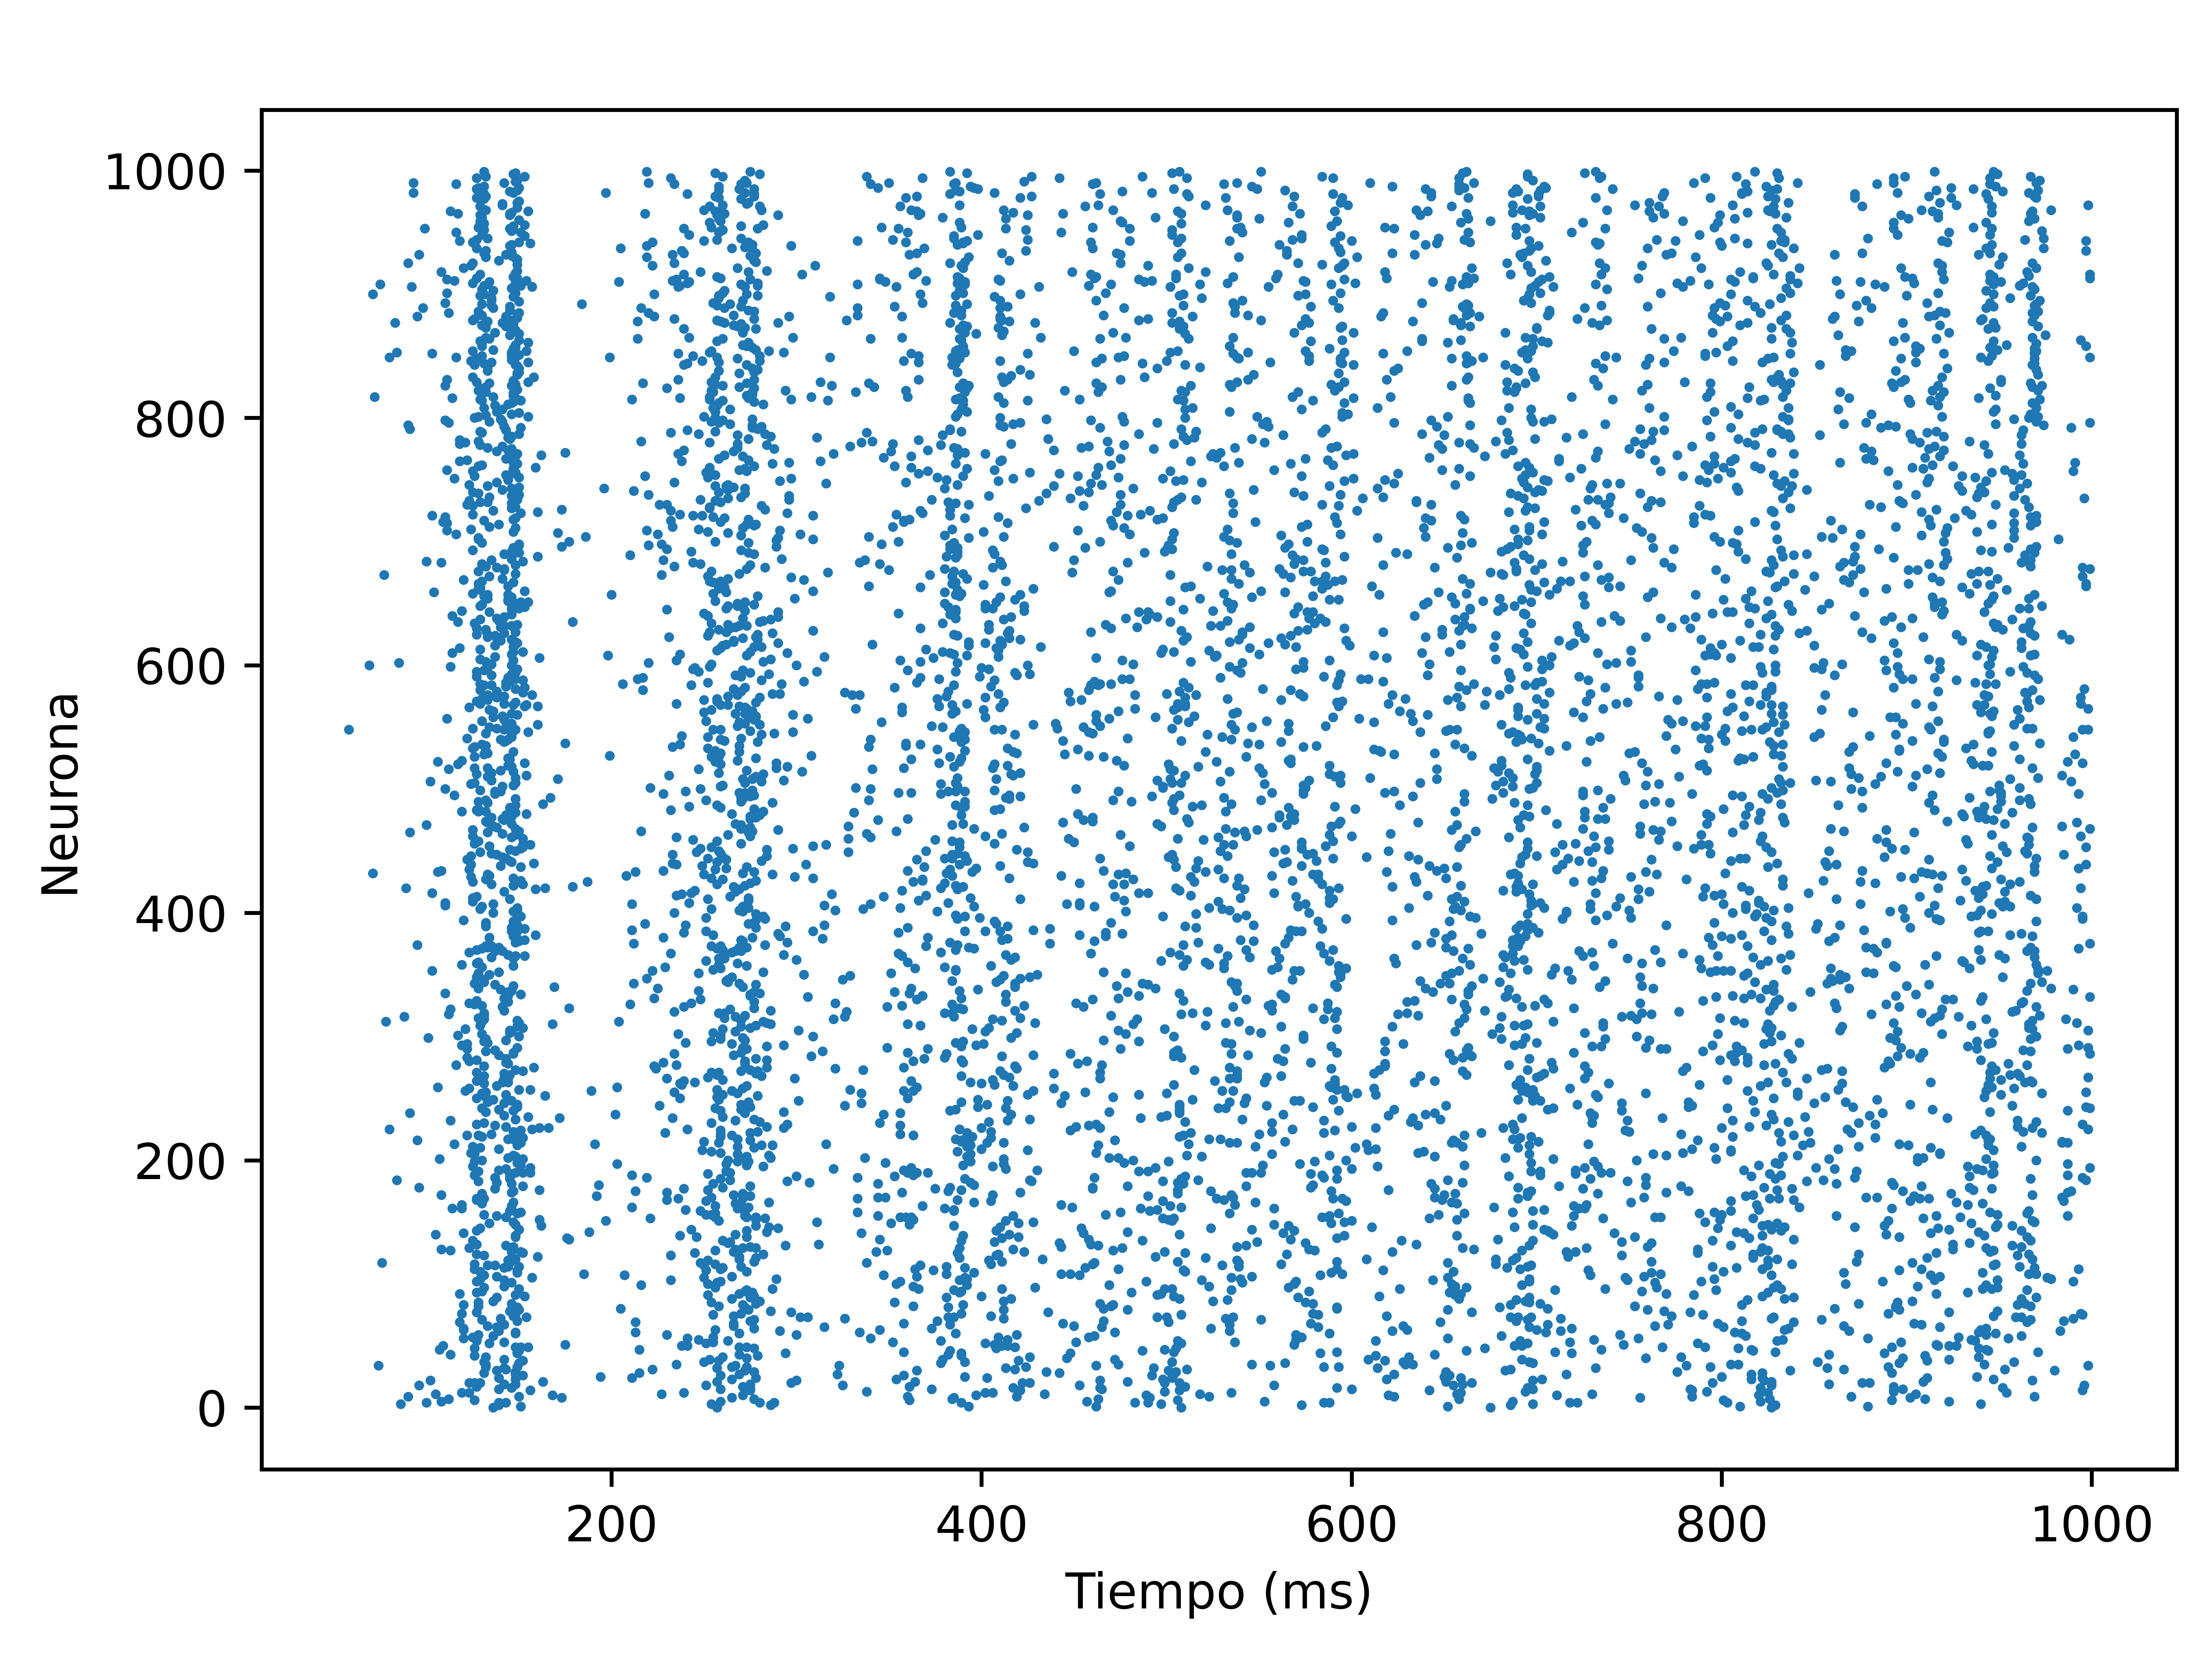

In [15]:
# 3.1)

plt.rcParams['figure.figsize'] = (7, 5) # Tamaño de la figura
plt.rcParams['figure.dpi'] = 1000 # Resolución de la figura
plt.title(" ")

g2 = 0.04
g1 = 5
g0 = 140

ne = 800 # numero de neuronas excitatorias
ni = 200 # numero de neuronas inhibitorias
n = ne + ni # numero total de neuronas

re = np.random.rand(ne) # vector de numeros aleatorios uniformes en [0,1) para neuronas excitatorias
ri = np.random.rand(ni) # vector de numeros aleatorios uniformes en [0

b = np.ones(n) 
b[:ne] *= 0.02 
b[ne:] = 0.02 + 0.08 * ri[:] 

c = np.ones(n)
c[:ne] *= 0.2
c[ne:] = 0.25 - 0.05 * ri[:]

vmin = -65 * np.ones(n)
vmin[:ne]+= 15 * np.square(re)
vmax = 30

du = np.ones(n)
du[:ne] = 8 - 6 * np.square(re)
du[ne:] *= 2

#a[i,j] es la sinapsis de la neurona j a la i

a = np.random.random(size=(n, n))
a[:,:ne] *= 0.5 
a[:,ne:] *= -1

#condición inicial
v = -65 * np.ones(n)
u = b * v

#firings es una lista de pares (t, i) donde t es el tiempo en que la neurona i dispara 
# aparecen tiempos repetidos si varias neuronas disparan a la vez
# al final firings es convertido en una matriz en donde cada fila es un par (t, i)
# asi firings[x, 0] sirve de coordenada x y firings[x, 1] de coordenada y de la k-ésima neurona que disparó

firings = []

# loop temporal
for t in range(1000):
    I = np.random.normal(size = n)
    I[:ne] *= 5
    I[ne:] *= 2
    fired = v >= vmax # indices de las neuronas que disparan
    for i in np.where(fired)[0]: # para cada neurona que disparó
        firings.append((t, i)) # agrego el par (t, i) a la lista de firings
    v[fired] = vmin[fired] # reset del potencial de las neuronas que dispararon
    u[fired] += du[fired] # aumento de la variable de recuperación de las neuronas que dispararon
    I += np.sum(a[:, fired], 1) 
    v = v + 0.5 * (g2 * np.square(v) + g1 * v + g0 - u + I) # paso de 0.5 ms
    v = v + 0.5 * (g2 * np.square(v) + g1 * v + g0 - u + I) # paso de 0.5 ms
    u = u + b * (c * v - u) # estabilidad numerica
    
if len(firings) > 1:
    firings = np.array(firings)
    plt.scatter(firings[:, 0], firings[:, 1], s=1)
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Neurona')
else:
    print("No hubo disparos")

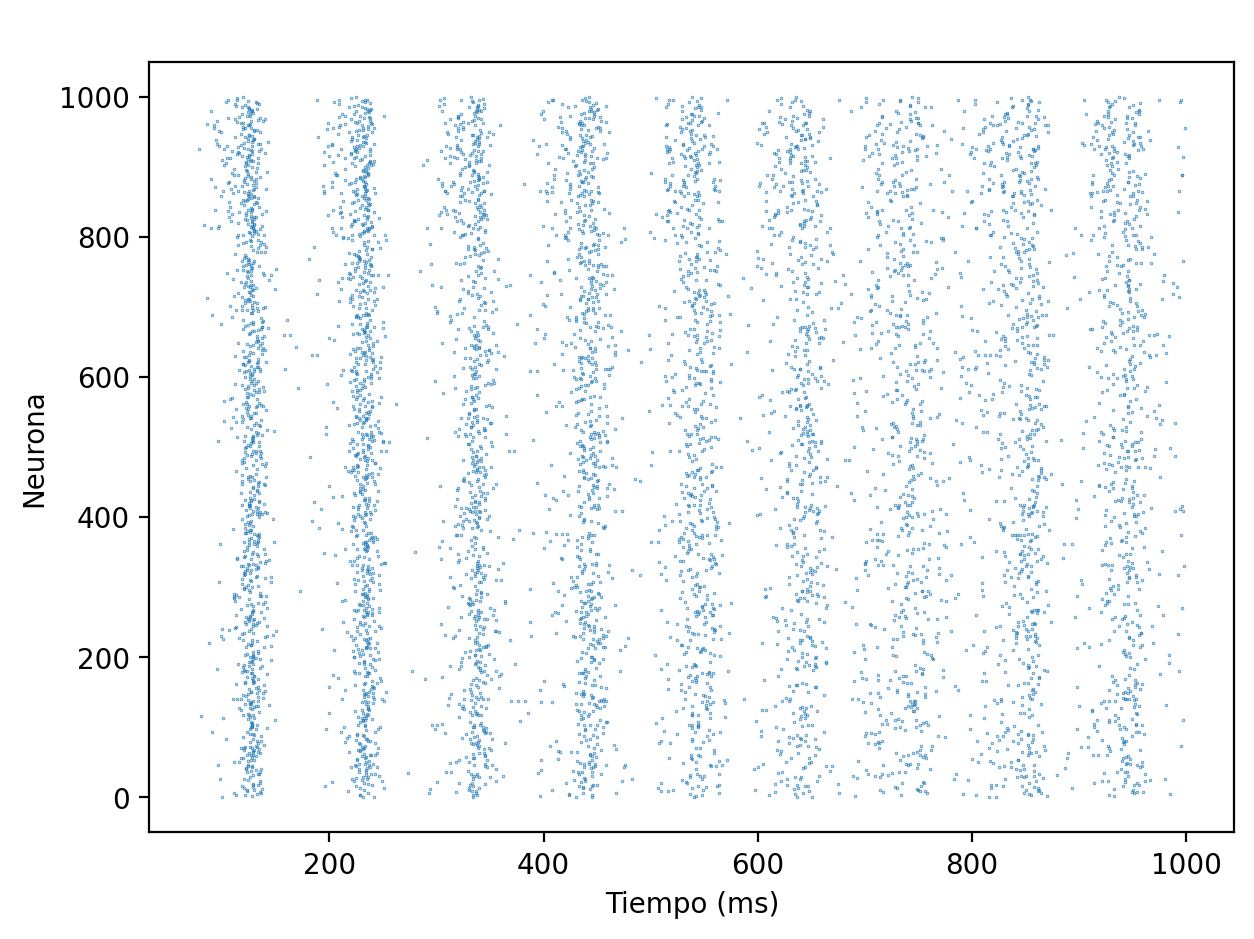

In [16]:
#3.2)

#plt.rcParams['figure.figsize'] = (7, 5) # Tamaño de la figura
plt.rcParams['figure.dpi'] = 200 # Resolución de la figura
plt.title(" ")

g2 = 0.04
g1 = 5
g0 = 140

ne = 800 # numero de neuronas excitatorias
ni = 200 # numero de neuronas inhibitorias
n = ne + ni # numero total de neuronas

re = np.random.rand(ne) # vector de numeros aleatorios uniformes en [0,1) para neuronas excitatorias
ri = np.random.rand(ni) # vector de numeros aleatorios uniformes en [0

b = np.ones(n) 
b[:ne] *= 0.02 
b[ne:] = 0.02 + 0.08 * ri[:] 

c = np.ones(n)
c[:ne] *= 0.2
c[ne:] = 0.25 - 0.05 * ri[:]

vmin = -65 * np.ones(n)
vmin[:ne]+= 15 * np.square(re)
vmax = 30

du = np.ones(n)
du[:ne] = 8 - 6 * np.square(re)
du[ne:] *= 2

#a[i,j] es la sinapsis de la neurona j a la i

a = np.random.random(size=(n, n))
a[:,:ne] *= 0.5 
a[:,ne:] *= -1

#condición inicial
v = -65 * np.ones(n)
u = b * v

# matriz interacción entre ruido y variables

g = np.zeros((n, n))
ruido = 0.75
for i in range (ne):
    g[i, i] = 5 * ruido
for i in range (ne, ne + ni):
    g[i, i] = 2 * ruido

#firings es una lista de pares (t, i) donde t es el tiempo en que la neurona i dispara
# aparecen tiempos repetidos si varias neuronas disparan a la vez
# al final firings es convertido en una matriz en donde cada fila es un par (t, i)
# asi firings[x, 0] sirve de coordenada x y firings[x,
# 1] de coordenada y de la k-ésima neurona que disparó
firings = []
# loop temporal
k = 1000 
tini = 0
tend = 1000
h = (tend - tini) / k

for j in range(k):
    t += h 
    w = np.random.normal(size = n)
    fired = v >= vmax # indices de las neuronas que disparan
    v[fired] = vmin[fired] # reset del potencial de las neuronas que dispararon
    u[fired] += du[fired] # aumento de la variable de recuperación de las neuronas que dispararon
    def z(v):
        return (87 + v) / 450 - 0.0193
    v += (g2 * np.square(v) + g1 * v + g0 - u + np.dot(a, z(v))) * h + np.dot(g, w) * np.sqrt(h) # paso de h ms
    u += b * (c * v - u) * h # estabilidad numerica
    for i in np.where(fired)[0]: # para cada neurona que disparó
        firings.append((j, i)) 

if len(firings) > 1:
    firings = np.array(firings)
    plt.scatter(firings[:, 0], firings[:, 1], s=.05)
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Neurona')
else:
    print("No hubo disparos")
